In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('training_setup.csv')

In [3]:
df.head()

,latitude,longitude,host_since,host_acceptance_rate,review_rating,room_type,price,minimum_nights,maximum_nights,availability_30,availability_365,price.1,inexpensive,mid,high,next_level,room_type.1
0,0.090080,-0.266930,8,78,0.00,Private room,100,1,365,30,365,100,0,0,0,1,Private room
1,0.129318,-0.305075,0,100,0.00,Entire home/apt,65,180,365,30,365,65,0,1,0,0,Entire home/apt
2,0.100980,-0.405000,3,91,0.00,Entire home/apt,132,2,28,12,35,132,0,1,0,0,Entire home/apt
3,-0.084890,-0.316010,13,100,14.68,Private room,100,5,1125,30,365,100,0,1,0,0,Private room
4,0.095082,-0.321206,9,46,0.00,Entire home/apt,120,5,90,23,337,120,0,0,0,1,Entire home/apt


In [4]:
x=pd.get_dummies(df['room_type'])

In [5]:
x

,Entire home/apt,Hotel room,Private room,Shared room
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
75231,1,0,0,0
75232,1,0,0,0
75233,0,0,1,0
75234,0,0,1,0


In [6]:
df=pd.concat([df,x],axis=1)

In [7]:
df.head()

,latitude,longitude,host_since,host_acceptance_rate,review_rating,room_type,price,minimum_nights,maximum_nights,availability_30,...,price.1,inexpensive,mid,high,next_level,room_type.1,Entire home/apt,Hotel room,Private room,Shared room
0,0.090080,-0.266930,8,78,0.00,Private room,100,1,365,30,...,100,0,0,0,1,Private room,0,0,1,0
1,0.129318,-0.305075,0,100,0.00,Entire home/apt,65,180,365,30,...,65,0,1,0,0,Entire home/apt,1,0,0,0
2,0.100980,-0.405000,3,91,0.00,Entire home/apt,132,2,28,12,...,132,0,1,0,0,Entire home/apt,1,0,0,0
3,-0.084890,-0.316010,13,100,14.68,Private room,100,5,1125,30,...,100,0,1,0,0,Private room,0,0,1,0
4,0.095082,-0.321206,9,46,0.00,Entire home/apt,120,5,90,23,...,120,0,0,0,1,Entire home/apt,1,0,0,0


In [9]:
train=df.drop(columns=['room_type.1','price.1','room_type'])

In [10]:
train.head()

,latitude,longitude,host_since,host_acceptance_rate,review_rating,price,minimum_nights,maximum_nights,availability_30,availability_365,inexpensive,mid,high,next_level,Entire home/apt,Hotel room,Private room,Shared room
0,0.090080,-0.266930,8,78,0.00,100,1,365,30,365,0,0,0,1,0,0,1,0
1,0.129318,-0.305075,0,100,0.00,65,180,365,30,365,0,1,0,0,1,0,0,0
2,0.100980,-0.405000,3,91,0.00,132,2,28,12,35,0,1,0,0,1,0,0,0
3,-0.084890,-0.316010,13,100,14.68,100,5,1125,30,365,0,1,0,0,0,0,1,0
4,0.095082,-0.321206,9,46,0.00,120,5,90,23,337,0,0,0,1,1,0,0,0


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_train,df_test=train_test_split(train,train_size=0.9)

In [16]:
df_train

,latitude,longitude,host_since,host_acceptance_rate,review_rating,price,minimum_nights,maximum_nights,availability_30,availability_365,inexpensive,mid,high,next_level,Entire home/apt,Hotel room,Private room,Shared room
31508,0.03280,-0.17470,11,100,25.00,250,3,365,1,134,0,1,0,0,1,0,0,0
37613,0.01109,-0.18769,4,78,28.98,43,360,1125,30,365,0,1,0,0,0,0,1,0
47545,-0.03558,-0.31757,7,78,0.00,68,1,1125,0,0,0,1,0,0,1,0,0,0
73401,-0.01708,-0.31982,6,98,287.91,50,3,1125,0,0,0,1,0,0,0,0,1,0
44551,0.00335,-0.12701,5,99,20.00,220,6,365,30,180,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25114,0.03558,-0.31396,10,38,5.00,115,7,365,3,28,0,0,0,1,1,0,0,0
71928,0.00578,-0.13136,1,99,10.00,234,2,365,8,271,0,1,0,0,1,0,0,0
70521,0.02006,-0.09004,4,99,168.98,55,1,1125,8,158,0,1,0,0,0,0,1,0
22500,0.01662,-0.38740,7,48,8.00,55,5,33,25,85,0,1,0,0,0,0,1,0


In [27]:
y_train=df_train['price']
x_train=df_train.drop(columns=['price'])


In [24]:
#for i in range(len(y_train))

TypeError: cannot convert the series to <class 'int'>

In [28]:
x_train.head()

,latitude,longitude,host_since,host_acceptance_rate,review_rating,minimum_nights,maximum_nights,availability_30,availability_365,inexpensive,mid,high,next_level,Entire home/apt,Hotel room,Private room,Shared room
31508,0.03280,-0.17470,11,100,25.00,3,365,1,134,0,1,0,0,1,0,0,0
37613,0.01109,-0.18769,4,78,28.98,360,1125,30,365,0,1,0,0,0,0,1,0
47545,-0.03558,-0.31757,7,78,0.00,1,1125,0,0,0,1,0,0,1,0,0,0
73401,-0.01708,-0.31982,6,98,287.91,3,1125,0,0,0,1,0,0,0,0,1,0
44551,0.00335,-0.12701,5,99,20.00,6,365,30,180,0,1,0,0,1,0,0,0


In [29]:
model_init=LinearRegression()

In [23]:
cols=x_train.columns

for i in cols:
    print(type(x_train[i][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>


In [31]:
model_init.fit(x_train,y_train)

LinearRegression()

In [32]:
y_test=df_test['price']
x_test=df_test.drop(columns=['price'])

In [33]:
preds=model_init.predict(x_test)

In [35]:
m_s_error=(preds-y_test)**2
m_s_error

549          5.693570
58731    42439.001392
7666     53906.929136
73533     3647.455673
65638    92595.374355
             ...     
38595     2390.775953
55483     2532.899781
23605    35471.733994
17547      183.062689
50303       26.112137
Name: price, Length: 7524, dtype: float64

In [38]:
y_test

549       96
58731     45
7666     130
73533     44
65638    650
        ... 
38595    100
55483    130
23605     33
17547    164
50303    192
Name: price, Length: 7524, dtype: int64

In [39]:
model_init.coef_

array([ 9.27149586e+01, -1.23314483e+02,  8.86350016e-03, -2.35288837e-02,
       -7.74296003e-02,  2.95409022e-01, -1.41645685e-08,  2.18866047e+00,
        2.47880537e-01,  3.90798505e-14,  1.89516172e+01, -7.10542736e-15,
       -1.89516172e+01,  7.65594469e+01,  3.07027365e+01, -4.21932116e+01,
       -6.50689718e+01])

In [40]:
mse=sum(m_s_error)/len(m_s_error)

In [45]:
math.sqrt(mse)

376.8570935901561

In [61]:
cols_drop=['inexpensive','mid','high','next_level','maximum_nights','availability_365','availability_30','latitude','longitude']

In [62]:
x_train=x_train.drop(columns=cols_drop)

In [44]:
import math

In [63]:
model=LinearRegression()

In [64]:
model.fit(x_train,y_train)

LinearRegression()

In [65]:
preds=model.predict(x_test.drop(columns=cols_drop))

C:\Users\chinm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- availability_30
- availability_365
- high
- inexpensive
- maximum_nights
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 15 features, but LinearRegression is expecting 8 features as input.

In [54]:
m_s_error=(preds-y_test)**2

In [55]:
m_s_error

549         752.486248
58731      9576.503536
7666      12893.976283
73533       666.317371
65638    160582.760816
             ...      
38595     12018.559795
55483      5207.833489
23605      4952.154318
17547      7144.906624
50303       107.845392
Name: price, Length: 7524, dtype: float64

In [56]:
mse=sum(m_s_error)/len(m_s_error)

In [58]:
math.sqrt(mse)

380.54254955240543

In [66]:
from sklearn.neighbors import KNeighborsRegressor

In [67]:
model=KNeighborsRegressor()

In [ ]:
model.fit()

In [70]:
x_train.drop(columns=['review_rating'],inplace=True)
x_test.drop(columns=['review_rating'],inplace=True)

In [71]:
model.fit(x_train,y_train)

KNeighborsRegressor()

In [72]:
preds=model.predict(x_test)

C:\Users\chinm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- availability_30
- availability_365
- high
- inexpensive
- latitude
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 16 features, but KNeighborsRegressor is expecting 7 features as input.

In [73]:
x_test.head()

,latitude,longitude,host_since,host_acceptance_rate,minimum_nights,maximum_nights,availability_30,availability_365,inexpensive,mid,high,next_level,Entire home/apt,Hotel room,Private room,Shared room
549,-0.017590,-0.267260,12,100,1,365,0,0,0,1,0,0,1,0,0,0
58731,0.098243,-0.379947,5,78,1,365,30,365,0,1,0,0,0,0,1,0
7666,-0.006770,-0.395180,7,67,1,1125,30,365,0,1,0,0,1,0,0,0
73533,0.031420,-0.114630,9,91,3,15,4,216,0,1,0,0,0,0,1,0
65638,-0.019407,-0.277819,1,100,1,365,30,365,0,1,0,0,1,0,0,0


In [74]:
cols_needed=x_train.columns

In [75]:
cols_test=x_test.columns

In [76]:
for i in cols_test:
    if i not in cols_needed:
        x_test.drop(columns=[i],inplace=True)

In [77]:
preds_knn=model.predict(x_test)

In [78]:
diff=preds_knn-y_test

In [79]:
diff

549       41.2
58731     -8.6
7666     633.8
73533     26.8
65638   -476.4
         ...  
38595     77.0
55483    -22.2
23605     18.2
17547    -46.8
50303      8.8
Name: price, Length: 7524, dtype: float64

(array([1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 8.000e+00, 7.359e+03,
        1.520e+02, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-19951.8 , -16553.32, -13154.84,  -9756.36,  -6357.88,  -2959.4 ,
           439.08,   3837.56,   7236.04,  10634.52,  14033.  ]),
 <BarContainer object of 10 artists>)

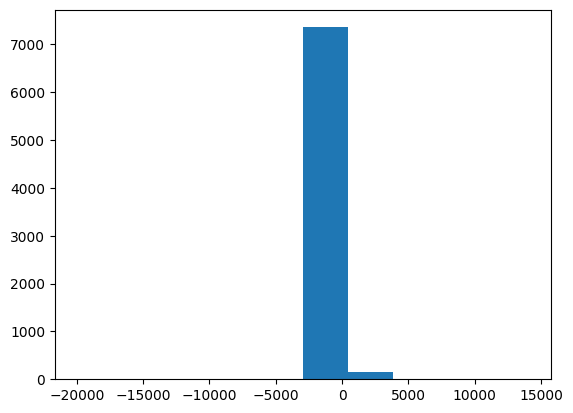

In [80]:
plt.hist(diff)

In [81]:
import seaborn as sns

<AxesSubplot: xlabel='price', ylabel='Count'>

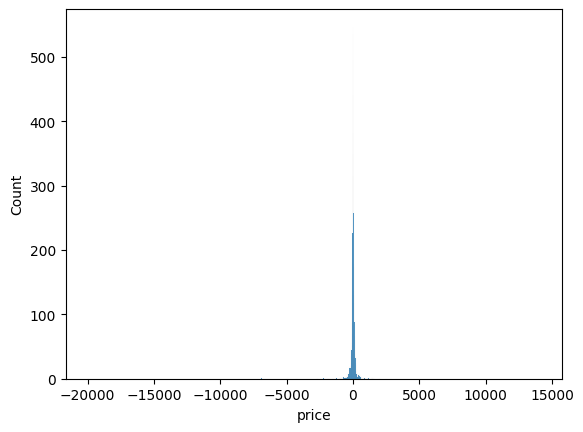

In [82]:
sns.histplot(diff)

In [83]:
sum(abs(preds_knn))/len(preds_knn)

179.86951089845743

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
max_depth=[3,5,8,10,15]
errors_list_list=[]
errors_list=[]

In [92]:
model_tree=DecisionTreeRegressor(max_depth=8)

In [88]:
for depth in max_depth:
    model_t=DecisionTreeRegressor()
    model_t.fit(x_train,y_train)
    preds_t=model_t.predict(x_test)
    preds_e=preds_t-y_test
    errors_list_list.append(preds_e)
    errors_list.append(sum(abs(preds_e))/len(preds_e))

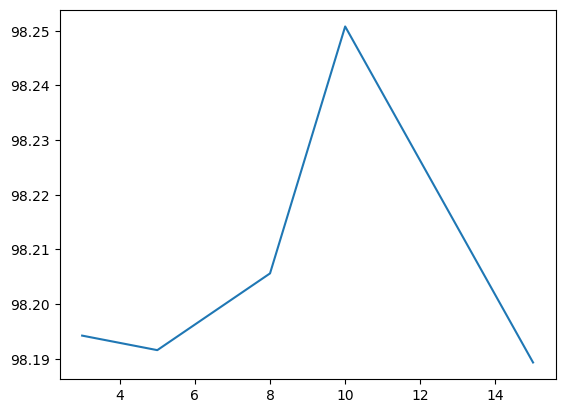

In [89]:
plt.plot(max_depth,errors_list)

In [90]:
#to the nearest 100 dollars from Decision Tree at depth=8

In [93]:
model_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [94]:
preds_tree=model_tree.predict(x_test)

In [95]:
ensemble_tree_knn=(preds_tree+preds_knn)/2

In [96]:
errors_ensemble=ensemble_tree_knn-y_test

In [97]:
errors_ensemble

549       72.829238
58731     16.797006
7666     544.114286
73533     27.735221
65638   -464.782916
            ...    
38595     87.731343
55483     -9.749793
23605     61.485586
17547    -62.293072
50303      5.970611
Name: price, Length: 7524, dtype: float64

In [100]:
preds_tree-y_test

549      104.458476
58731     42.194011
7666     454.428571
73533     28.670443
65638   -453.165831
            ...    
38595     98.462687
55483      2.700414
23605    104.771171
17547    -77.786143
50303      3.141221
Name: price, Length: 7524, dtype: float64

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
model_try=RandomForestRegressor()

In [103]:
model_try.fit(x_train,y_train)

RandomForestRegressor()

In [105]:
preds_try=model_try.predict(x_test)

In [106]:
error=preds_try-y_test

In [107]:
error

549       60.430421
58731     46.485516
7666     754.727190
73533     19.301187
65638   -453.868690
            ...    
38595     68.156724
55483    -12.460713
23605     77.055039
17547    -88.294163
50303    -35.276753
Name: price, Length: 7524, dtype: float64

In [108]:
sum(abs(error))/len(error)

95.33288333306346

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 7.000e+00,
        1.900e+01, 7.484e+03, 8.000e+00, 2.000e+00]),
 array([-19744.415     , -17098.82948594, -14453.24397189, -11807.65845783,
         -9162.07294378,  -6516.48742972,  -3870.90191567,  -1225.31640161,
          1420.26911245,   4065.8546265 ,   6711.44014056]),
 <BarContainer object of 10 artists>)

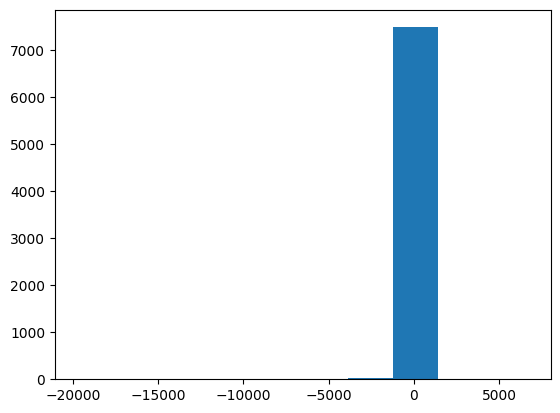

In [109]:
plt.hist(error)